#ETL - Dados Hospitalizados/Óbitos

## Extract

Importando Bibliotecas

In [ ]:
import os
from google.cloud import storage
import io
from io import BytesIO

Utilizando chave de Serviço do GCP

In [ ]:
# Criando o client object

storage_client = storage.Client.from_service_account_json('/content/projeto-finalsc01-b94741ddd471.json')

Acessando Bucket do Projeto

In [ ]:
BUCKET_NAME = 'projeto-finalsc01'
bucket = storage_client.get_bucket(BUCKET_NAME)

Listando Arquivos do Bucket

In [ ]:
filename = list(bucket.list_blobs(prefix=''))
for name in filename:
  print(name.name)

chave/
chave/projeto-finalsc01-b94741ddd471.json
dados-brutos/
dados-brutos/COVID-19_Vaccinations_in_the_United_States_County.csv
dados-brutos/COVID_US_HOSPITALIZATION.json
dados-tratados/
dados-tratados/Casos_Hospitalizacoes_Obitos_Cidade.csv
dados-tratados/Fairfield_County_Hospitalizacoes.csv
dados-tratados/Fairfield_County_vacinacao.csv
dados-tratados/Hartford_County_Hospitalizacoes.csv
dados-tratados/Hartford_County_vacinacao.csv
dados-tratados/Litchfield_County_Hospitalizacoes.csv
dados-tratados/Middlesex_County_Hospitalizacoes.csv
dados-tratados/New_Haven_County_Hospitalizacoes.csv
dados-tratados/New_Haven_County_vacinacao.csv
dados-tratados/New_London_County_Hospitalizacoes.csv
dados-tratados/New_London_County_vacinacao.csv
dados-tratados/Tolland_County_Hospitalizacoes.csv
dados-tratados/Vacinacoes_nos_EUA.csv
dados-tratados/Windham_County_Hospitalizacoes.csv
dados-tratados/vacina_8_condados_us.csv
dados_tratados_condados/
dados_tratados_condados/Condados_Hospitalizados.csv
dado

Carregando Datasets

In [ ]:
# Carregando Datasets CSV New_Haven_County

blop = bucket.blob('dados-tratados/New_Haven_County_Hospitalizacoes.csv')
data = blop.download_as_string()

In [ ]:
# Carregando Datasets CSV Fairfield_County

blop = bucket.blob('dados-tratados/Fairfield_County_Hospitalizacoes.csv')
data2 = blop.download_as_string()

In [ ]:
# Carregando Datasets CSV Hartford_County

blop = bucket.blob('dados-tratados/Hartford_County_Hospitalizacoes.csv')
data3 = blop.download_as_string()

## Transform and Load com Pandas

In [ ]:
import pandas as pd

Criando DataFrame

In [ ]:
df1 = pd.read_csv(io.BytesIO(data), encoding='utf-8', sep=',', parse_dates = ['Data_Atualizacao'], dayfirst = True)

df1

,Data_Atualizacao,Condado_Codigo,Condado,Casos_Total,Casos_Confirmados,Casos_Provaveis,Casos_Total_Taxa,Casos_Hospitalizados,Obitos_Total,Obitos_Confirmados,Obitos_Provaveis
0,2020-06-02,5,New Haven County,11548,11161,387,1347.0,150,990,843,147
1,2020-06-03,5,New Haven County,11582,11191,391,1350.0,128,992,845,147
2,2020-06-04,5,New Haven County,11673,11282,391,1361.0,127,999,855,144
3,2020-06-05,5,New Haven County,11817,11429,388,1378.0,121,1007,865,142
4,2020-06-06,5,New Haven County,11828,11441,387,1379.0,110,1010,867,143
...,...,...,...,...,...,...,...,...,...,...,...
447,2021-11-11,5,New Haven County,106641,95256,11385,12476.0,80,2250,1940,310
448,2021-11-12,5,New Haven County,106748,95362,11386,12489.0,69,2250,1940,310
449,2021-11-15,5,New Haven County,107237,95846,11391,12546.0,70,2256,1946,310
450,2021-11-16,5,New Haven County,107382,95961,11421,12563.0,71,2256,1946,310


Droppando colunas

In [ ]:
df1.drop(['Casos_Provaveis', 'Casos_Total', 'Casos_Provaveis', 'Casos_Total_Taxa', 'Obitos_Total', 'Obitos_Provaveis', 'Condado_Codigo'],axis=1, inplace=True)

In [ ]:
df1

,Data_Atualizacao,Condado,Casos_Confirmados,Casos_Hospitalizados,Obitos_Confirmados
0,2020-06-02,New Haven County,11161,150,843
1,2020-06-03,New Haven County,11191,128,845
2,2020-06-04,New Haven County,11282,127,855
3,2020-06-05,New Haven County,11429,121,865
4,2020-06-06,New Haven County,11441,110,867
...,...,...,...,...,...
447,2021-11-11,New Haven County,95256,80,1940
448,2021-11-12,New Haven County,95362,69,1940
449,2021-11-15,New Haven County,95846,70,1946
450,2021-11-16,New Haven County,95961,71,1946


Criando colunas com casos diários

In [ ]:
df1['Casos_Novos'] = df1['Casos_Confirmados'].sub(df1['Casos_Confirmados'].shift())
df1['Casos_Novos'].iloc[0] = df1['Casos_Confirmados'].iloc[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df1['Novos_Obitos_Confirmados'] = df1['Obitos_Confirmados'].sub(df1['Obitos_Confirmados'].shift())
df1['Novos_Obitos_Confirmados'].iloc[0] = df1['Obitos_Confirmados'].iloc[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df1.rename(columns={'Casos_Confirmados': 'Total_Casos_Confirmados', 'Obitos_Confirmados': 'Total_Obitos_Confirmados', 'Casos_Hospitalizados': 'Total_Casos_Hospitalizados'}, inplace=True)

In [ ]:
df1

,Data_Atualizacao,Condado,Total_Casos_Confirmados,Total_Casos_Hospitalizados,Total_Obitos_Confirmados,Casos_Novos,Novos_Obitos_Confirmados
0,2020-06-02,New Haven County,11161,150,843,11161.0,843.0
1,2020-06-03,New Haven County,11191,128,845,30.0,2.0
2,2020-06-04,New Haven County,11282,127,855,91.0,10.0
3,2020-06-05,New Haven County,11429,121,865,147.0,10.0
4,2020-06-06,New Haven County,11441,110,867,12.0,2.0
...,...,...,...,...,...,...,...
447,2021-11-11,New Haven County,95256,80,1940,107.0,0.0
448,2021-11-12,New Haven County,95362,69,1940,106.0,0.0
449,2021-11-15,New Haven County,95846,70,1946,484.0,6.0
450,2021-11-16,New Haven County,95961,71,1946,115.0,0.0


Salvando arquivos e fazendo upload em nuvem

In [ ]:
bucket = storage_client.get_bucket('projeto-finalsc01')
bucket.blob('dados_tratados_condados/New_Haven_County_Hospitalizados.csv').upload_from_string(df1.to_csv(index=False),'New_Haven_County_Hospiatlizados.csv')

In [ ]:
df1.to_csv('New_Haven_County_Hospitalizados.csv', index=False)

Tratamento DataFrame 2

Criando DataFrame

In [ ]:
df2 = pd.read_csv(io.BytesIO(data2), encoding='utf-8', sep=',', parse_dates = ['Data_Atualizacao'], dayfirst = True)

df2

,Data_Atualizacao,Condado_Codigo,Condado,Casos_Total,Casos_Confirmados,Casos_Provaveis,Casos_Total_Taxa,Casos_Hospitalizados,Obitos_Total,Obitos_Confirmados,Obitos_Provaveis
0,2020-06-02,1,Fairfield County,15789,15087,702,1673.0,134,1289,998,291
1,2020-06-03,1,Fairfield County,15843,15133,710,1679.0,126,1293,1002,291
2,2020-06-04,1,Fairfield County,15914,15204,710,1686.0,111,1304,1011,293
3,2020-06-05,1,Fairfield County,16020,15307,713,1697.0,108,1309,1017,292
4,2020-06-06,1,Fairfield County,16056,15342,714,1701.0,111,1312,1019,293
...,...,...,...,...,...,...,...,...,...,...,...
447,2021-11-11,1,Fairfield County,113337,101770,11567,12015.0,45,2311,1857,454
448,2021-11-12,1,Fairfield County,113415,101830,11585,12023.0,44,2311,1857,454
449,2021-11-15,1,Fairfield County,113869,102256,11613,12071.0,52,2315,1860,455
450,2021-11-16,1,Fairfield County,113993,102374,11619,12084.0,48,2315,1860,455


Droppando colunas

In [ ]:
df2.drop(['Casos_Provaveis', 'Casos_Total', 'Casos_Provaveis', 'Casos_Total_Taxa', 'Obitos_Total', 'Obitos_Provaveis', 'Condado_Codigo'],axis=1, inplace=True)

Criando colunas com casos diários

In [ ]:
df2['Casos_Novos'] = df2['Casos_Confirmados'].sub(df2['Casos_Confirmados'].shift())
df2['Casos_Novos'].iloc[0] = df2['Casos_Confirmados'].iloc[0]

df2['Novos_Obitos_Confirmados'] = df2['Obitos_Confirmados'].sub(df2['Obitos_Confirmados'].shift())
df2['Novos_Obitos_Confirmados'].iloc[0] = df2['Obitos_Confirmados'].iloc[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Renomeando colunas

In [ ]:
df2.rename(columns={'Casos_Confirmados': 'Total_Casos_Confirmados', 'Obitos_Confirmados': 'Total_Obitos_Confirmados', 'Casos_Hospitalizados': 'Total_Casos_Hospitalizados'}, inplace=True)

In [ ]:
df2

,Data_Atualizacao,Condado,Total_Casos_Confirmados,Total_Casos_Hospitalizados,Total_Obitos_Confirmados,Casos_Novos,Novos_Obitos_Confirmados
0,2020-06-02,Fairfield County,15087,134,998,15087.0,998.0
1,2020-06-03,Fairfield County,15133,126,1002,46.0,4.0
2,2020-06-04,Fairfield County,15204,111,1011,71.0,9.0
3,2020-06-05,Fairfield County,15307,108,1017,103.0,6.0
4,2020-06-06,Fairfield County,15342,111,1019,35.0,2.0
...,...,...,...,...,...,...,...
447,2021-11-11,Fairfield County,101770,45,1857,84.0,0.0
448,2021-11-12,Fairfield County,101830,44,1857,60.0,0.0
449,2021-11-15,Fairfield County,102256,52,1860,426.0,3.0
450,2021-11-16,Fairfield County,102374,48,1860,118.0,0.0


Salvando arquivos e fazendo upload em nuvem

In [ ]:
bucket = storage_client.get_bucket('projeto-finalsc01')
bucket.blob('dados_tratados_condados/Fairfield_County_Hospitalizados.csv').upload_from_string(df2.to_csv(index=False),'Fairfield_County_Hospitalizados.csv')

In [ ]:
df2.to_csv('Fairfield_County_Hospitalizados.csv', index=False)

Tratamento DataFrame 3

Criando DataFrame

In [ ]:
df3 = pd.read_csv(io.BytesIO(data3), encoding='utf-8', sep=',', parse_dates = ['Data_Atualizacao'], dayfirst = True)

df3

,Data_Atualizacao,Condado_Codigo,Condado,Casos_Total,Casos_Confirmados,Casos_Provaveis,Casos_Total_Taxa,Casos_Hospitalizados,Obitos_Total,Obitos_Confirmados,Obitos_Provaveis
0,2020-06-02,2,Hartford County,10593,9914,679,1187.0,92,1259,958,301
1,2020-06-03,2,Hartford County,10636,9947,689,1191.0,90,1266,964,302
2,2020-06-04,2,Hartford County,10677,9982,695,1196.0,83,1277,968,309
3,2020-06-05,2,Hartford County,10747,10046,701,1204.0,78,1279,971,308
4,2020-06-06,2,Hartford County,10809,10112,697,1211.0,87,1287,977,310
...,...,...,...,...,...,...,...,...,...,...,...
447,2021-11-11,2,Hartford County,99967,92440,7527,11211.0,64,2600,2126,474
448,2021-11-12,2,Hartford County,100069,92539,7530,11222.0,66,2600,2126,474
449,2021-11-15,2,Hartford County,100503,92963,7540,11271.0,61,2603,2129,474
450,2021-11-16,2,Hartford County,100630,93082,7548,11285.0,72,2603,2129,474


Droppando colunas

In [ ]:
df3.drop(['Casos_Provaveis', 'Casos_Total', 'Casos_Provaveis', 'Casos_Total_Taxa', 'Obitos_Total', 'Obitos_Provaveis', 'Condado_Codigo'],axis=1, inplace=True)

Criando coluna com casos diários

In [ ]:
df3['Casos_Novos'] = df3['Casos_Confirmados'].sub(df3['Casos_Confirmados'].shift())
df3['Casos_Novos'].iloc[0] = df3['Casos_Confirmados'].iloc[0]

df3['Novos_Obitos_Confirmados'] = df3['Obitos_Confirmados'].sub(df3['Obitos_Confirmados'].shift())
df3['Novos_Obitos_Confirmados'].iloc[0] = df3['Obitos_Confirmados'].iloc[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Renomeando colunas

In [ ]:
df3.rename(columns={'Casos_Confirmados': 'Total_Casos_Confirmados', 'Obitos_Confirmados': 'Total_Obitos_Confirmados', 'Casos_Hospitalizados': 'Total_Casos_Hospitalizados'}, inplace=True)

In [ ]:
df3

,Data_Atualizacao,Condado,Total_Casos_Confirmados,Total_Casos_Hospitalizados,Total_Obitos_Confirmados,Casos_Novos,Novos_Obitos_Confirmados
0,2020-06-02,Hartford County,9914,92,958,9914.0,958.0
1,2020-06-03,Hartford County,9947,90,964,33.0,6.0
2,2020-06-04,Hartford County,9982,83,968,35.0,4.0
3,2020-06-05,Hartford County,10046,78,971,64.0,3.0
4,2020-06-06,Hartford County,10112,87,977,66.0,6.0
...,...,...,...,...,...,...,...
447,2021-11-11,Hartford County,92440,64,2126,118.0,0.0
448,2021-11-12,Hartford County,92539,66,2126,99.0,0.0
449,2021-11-15,Hartford County,92963,61,2129,424.0,3.0
450,2021-11-16,Hartford County,93082,72,2129,119.0,0.0


Salvando arquivos e fazendo upload em nuvem

In [ ]:
bucket = storage_client.get_bucket('projeto-finalsc01')
bucket.blob('dados_tratados_condados/Hartford_County_Hospitalizados.csv').upload_from_string(df3.to_csv(index=False),'Hartford_County_Hospitalizados.csv')

In [ ]:
df3.to_csv('Hartford_County_Hospitalizados.csv', index=False)

# Unindo DataFrames Hospitalizados/Óbitos com Append

In [ ]:
dfa = df1.append([df2, df3], ignore_index=True)

In [ ]:
dfa

,Data_Atualizacao,Condado,Total_Casos_Confirmados,Total_Casos_Hospitalizados,Total_Obitos_Confirmados,Casos_Novos,Novos_Obitos_Confirmados
0,2020-06-02,New Haven County,11161,150,843,11161.0,843.0
1,2020-06-03,New Haven County,11191,128,845,30.0,2.0
2,2020-06-04,New Haven County,11282,127,855,91.0,10.0
3,2020-06-05,New Haven County,11429,121,865,147.0,10.0
4,2020-06-06,New Haven County,11441,110,867,12.0,2.0
...,...,...,...,...,...,...,...
1351,2021-11-11,Hartford County,92440,64,2126,118.0,0.0
1352,2021-11-12,Hartford County,92539,66,2126,99.0,0.0
1353,2021-11-15,Hartford County,92963,61,2129,424.0,3.0
1354,2021-11-16,Hartford County,93082,72,2129,119.0,0.0


Salvando arquivos e fazendo upload em nuvem

In [ ]:
#bucket = storage_client.get_bucket('projeto-finalsc01')
#bucket.blob('dados_tratados_condados/Condados_Hospitalizados.csv').upload_from_string(dfa.to_csv(index=False),'Condados_Hospitalizados.csv')

In [ ]:
dfa.to_csv('Condados_Hospitalizados.csv', index=False)

#ETL Dados Vacinacão

## Extract

Listando Arquivos do Bucket

In [ ]:
filename = list(bucket.list_blobs(prefix=''))
for name in filename:
  print(name.name)

chave/
chave/projeto-finalsc01-b94741ddd471.json
dados-brutos/
dados-brutos/COVID-19_Vaccinations_in_the_United_States_County.csv
dados-brutos/COVID_US_HOSPITALIZATION.json
dados-tratados/
dados-tratados/Casos_Hospitalizacoes_Obitos_Cidade.csv
dados-tratados/Fairfield_County_Hospitalizacoes.csv
dados-tratados/Fairfield_County_vacinacao.csv
dados-tratados/Hartford_County_Hospitalizacoes.csv
dados-tratados/Hartford_County_vacinacao.csv
dados-tratados/Litchfield_County_Hospitalizacoes.csv
dados-tratados/Middlesex_County_Hospitalizacoes.csv
dados-tratados/New_Haven_County_Hospitalizacoes.csv
dados-tratados/New_Haven_County_vacinacao.csv
dados-tratados/New_London_County_Hospitalizacoes.csv
dados-tratados/New_London_County_vacinacao.csv
dados-tratados/Tolland_County_Hospitalizacoes.csv
dados-tratados/Vacinacoes_nos_EUA.csv
dados-tratados/Windham_County_Hospitalizacoes.csv
dados-tratados/vacina_8_condados_us.csv
dados_tratados_condados/
dados_tratados_condados/Condados_Hospitalizados.csv
dado

Carregando Datasets Vacinação

In [ ]:
# Carregando Datasets CSV New_Haven_County Vacinação

blop = bucket.blob('dados-tratados/New_Haven_County_vacinacao.csv')
data4 = blop.download_as_string()

In [ ]:
# Carregando Datasets CSV Fairfield_County Vacinação

blop = bucket.blob('dados-tratados/Fairfield_County_vacinacao.csv')
data5 = blop.download_as_string()

In [ ]:
# Carregando Datasets CSV Hartford_County Vacinação

blop = bucket.blob('dados-tratados/Hartford_County_vacinacao.csv')
data6 = blop.download_as_string()

## Transform and Load com Pandas

Tratamento DataFrame 4

Criando DataFrame

In [ ]:
df4 = pd.read_csv(io.BytesIO(data4), encoding='utf-8', sep=',')

df4.head()

,indice,Data,Condado,Estado,Numero_total_vacinados,Numero_total_65+,Porcentagem_total_65+
0,332,2021-08-10,New Haven County,CT,581344,137567,90.1
1,324,2021-09-10,New Haven County,CT,581984,137635,90.2
2,313,2021-10-10,New Haven County,CT,582504,137680,90.2
3,309,2021-11-10,New Haven County,CT,583285,137737,90.2
4,301,2021-12-10,New Haven County,CT,583557,137754,90.3


Criando colunas com dados diários

In [ ]:
df4['Vacinas_Dia'] = df4['Numero_total_vacinados'].sub(df4['Numero_total_vacinados'].shift())
df4['Vacinas_Dia'].iloc[0] = df4['Numero_total_vacinados'].iloc[0]

df4['Vacinas_Dia_65+'] = df4['Numero_total_65+'].sub(df4['Numero_total_65+'].shift())
df4['Vacinas_Dia_65+'].iloc[0] = df4['Numero_total_65+'].iloc[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df4.head()

,indice,Data,Condado,Estado,Numero_total_vacinados,Numero_total_65+,Porcentagem_total_65+,Vacinas_Dia,Vacinas_Dia_65+
0,332,2021-08-10,New Haven County,CT,581344,137567,90.1,581344.0,137567.0
1,324,2021-09-10,New Haven County,CT,581984,137635,90.2,640.0,68.0
2,313,2021-10-10,New Haven County,CT,582504,137680,90.2,520.0,45.0
3,309,2021-11-10,New Haven County,CT,583285,137737,90.2,781.0,57.0
4,301,2021-12-10,New Haven County,CT,583557,137754,90.3,272.0,17.0


Salvando arquivos e fazendo upload em nuvem

In [ ]:
bucket = storage_client.get_bucket('projeto-finalsc01')
bucket.blob('dados_tratados_condados/New_Haven_County_Vacinacao.csv').upload_from_string(df4.to_csv(index=False),'New_Haven_County_Vacinacao.csv')

In [ ]:
df4.to_csv('New_Haven_County_Vacinacao.csv', index=False)

Tratamento DataFrame 5

Criando DataFrame

In [ ]:
df5 = pd.read_csv(io.BytesIO(data5), encoding='utf-8', sep=',')

df5.head()

,indice,Data,Condado,Estado,Numero_total_vacinados,Numero_total_65+,Porcentagem_total_65+
0,333,2021-08-10,Fairfield County,CT,669951,139370,90.5
1,325,2021-09-10,Fairfield County,CT,670549,139440,90.6
2,312,2021-10-10,Fairfield County,CT,671094,139495,90.6
3,311,2021-11-10,Fairfield County,CT,671797,139548,90.6
4,302,2021-12-10,Fairfield County,CT,672101,139576,90.7


Criando colunas com dados diários

In [ ]:
df5['Vacinas_Dia'] = df5['Numero_total_vacinados'].sub(df5['Numero_total_vacinados'].shift())
df5['Vacinas_Dia'].iloc[0] = df5['Numero_total_vacinados'].iloc[0]

df5['Vacinas_Dia_65+'] = df5['Numero_total_65+'].sub(df5['Numero_total_65+'].shift())
df5['Vacinas_Dia_65+'].iloc[0] = df5['Numero_total_65+'].iloc[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df5.head()

,indice,Data,Condado,Estado,Numero_total_vacinados,Numero_total_65+,Porcentagem_total_65+,Vacinas_Dia,Vacinas_Dia_65+
0,333,2021-08-10,Fairfield County,CT,669951,139370,90.5,669951.0,139370.0
1,325,2021-09-10,Fairfield County,CT,670549,139440,90.6,598.0,70.0
2,312,2021-10-10,Fairfield County,CT,671094,139495,90.6,545.0,55.0
3,311,2021-11-10,Fairfield County,CT,671797,139548,90.6,703.0,53.0
4,302,2021-12-10,Fairfield County,CT,672101,139576,90.7,304.0,28.0


Salvando arquivos e fazendo upload em nuvem

In [ ]:
bucket = storage_client.get_bucket('projeto-finalsc01')
bucket.blob('dados_tratados_condados/Fairfield_County_Vacinacao.csv').upload_from_string(df5.to_csv(index=False),'Fairfield_County_Vacinacao.csv')

In [ ]:
df5.to_csv('Fairfield_County_Vacinacao.csv', index=False)

Tratamento DataFrame 6

Criando DataFrame

In [ ]:
df6 = pd.read_csv(io.BytesIO(data6), encoding='utf-8', sep=',')

df6.head()

,indice,Data,Condado,Estado,Numero_total_vacinados,Numero_total_65+,Porcentagem_total_65+
0,340,2021-07-10,Hartford County,CT,592463,143645,92.4
1,331,2021-08-10,Hartford County,CT,593355,143713,92.4
2,327,2021-09-10,Hartford County,CT,594020,143781,92.5
3,319,2021-10-10,Hartford County,CT,594595,143818,92.5
4,305,2021-11-10,Hartford County,CT,595188,143867,92.5


Criando colunas com dados diários

In [ ]:
df6['Vacinas_Dia'] = df6['Numero_total_vacinados'].sub(df6['Numero_total_vacinados'].shift())
df6['Vacinas_Dia'].iloc[0] = df6['Numero_total_vacinados'].iloc[0]

df6['Vacinas_Dia_65+'] = df6['Numero_total_65+'].sub(df6['Numero_total_65+'].shift())
df6['Vacinas_Dia_65+'].iloc[0] = df6['Numero_total_65+'].iloc[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df6.head()

,indice,Data,Condado,Estado,Numero_total_vacinados,Numero_total_65+,Porcentagem_total_65+,Vacinas_Dia,Vacinas_Dia_65+
0,340,2021-07-10,Hartford County,CT,592463,143645,92.4,592463.0,143645.0
1,331,2021-08-10,Hartford County,CT,593355,143713,92.4,892.0,68.0
2,327,2021-09-10,Hartford County,CT,594020,143781,92.5,665.0,68.0
3,319,2021-10-10,Hartford County,CT,594595,143818,92.5,575.0,37.0
4,305,2021-11-10,Hartford County,CT,595188,143867,92.5,593.0,49.0


Salvando arquivos e fazendo upload em nuvem

In [ ]:
bucket = storage_client.get_bucket('projeto-finalsc01')
bucket.blob('dados_tratados_condados/Hartford_County_Vacinacao.csv').upload_from_string(df6.to_csv(index=False),'Hartford_County_Vacinacao.csv')

In [ ]:
df6.to_csv('Hartford_County_Vacinacao.csv', index=False)

#Unindo DataFrames de Vacinação com Append

In [ ]:
dfb = df4.append([df5, df6], ignore_index=True)

In [ ]:
dfb

,indice,Data,Condado,Estado,Numero_total_vacinados,Numero_total_65+,Porcentagem_total_65+,Vacinas_Dia,Vacinas_Dia_65+
0,332,2021-08-10,New Haven County,CT,581344,137567,90.1,581344.0,137567.0
1,324,2021-09-10,New Haven County,CT,581984,137635,90.2,640.0,68.0
2,313,2021-10-10,New Haven County,CT,582504,137680,90.2,520.0,45.0
3,309,2021-11-10,New Haven County,CT,583285,137737,90.2,781.0,57.0
4,301,2021-12-10,New Haven County,CT,583557,137754,90.3,272.0,17.0
...,...,...,...,...,...,...,...,...,...
122,35,2021-11-13,Hartford County,CT,610264,145400,93.5,0.0,0.0
123,24,2021-11-14,Hartford County,CT,610651,145437,93.5,387.0,37.0
124,17,2021-11-15,Hartford County,CT,610972,145461,93.5,321.0,24.0
125,12,2021-11-16,Hartford County,CT,611131,145475,93.6,159.0,14.0


Salvando arquivos e fazendo upload em nuvem

In [ ]:
dfb.drop(['indice'], axis=1, inplace=True)

In [ ]:
bucket = storage_client.get_bucket('projeto-finalsc01')
bucket.blob('dados_tratados_condados/Condados_Vacinacao.csv').upload_from_string(dfb.to_csv(index=False),'Condados_Vacinacao.csv')

In [ ]:
dfb.head()

,Data,Condado,Estado,Numero_total_vacinados,Numero_total_65+,Porcentagem_total_65+,Vacinas_Dia,Vacinas_Dia_65+
0,2021-08-10,New Haven County,CT,581344,137567,90.1,581344.0,137567.0
1,2021-09-10,New Haven County,CT,581984,137635,90.2,640.0,68.0
2,2021-10-10,New Haven County,CT,582504,137680,90.2,520.0,45.0
3,2021-11-10,New Haven County,CT,583285,137737,90.2,781.0,57.0
4,2021-12-10,New Haven County,CT,583557,137754,90.3,272.0,17.0


In [ ]:
dfb.to_csv('Condados_Vacinacao.csv', index=False)

# PySpark - Hospitalizados

In [ ]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 33 kB/s 
     |████████████████████████████████| 198 kB 42.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=e12611c94573c047b3a4d4d7d39d59ec6388d35eb96dbed28f497379103c870f
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


Importando bibliotecas

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, FloatType, DateType
from pyspark.sql.window import Window
from pyspark.sql.functions import sum
from pyspark.sql.functions import avg
from pyspark.sql.functions import max
from pyspark.sql.functions import min

Iniciando sessão spark

In [ ]:
spark = SparkSession.builder.master('local').appName('projetofinal').config('spark.ui.port', '4050').getOrCreate()

Criando DataFrame Hospitalizados

In [ ]:
dfspark1 = spark.read.format('csv').option('header','true').option('inferschema', 'true').option('delimiter', ',').load('/content/Condados_Hospitalizados.csv')

In [ ]:
dfspark1.printSchema()
dfspark1.show()

root
 |-- Data_Atualizacao: string (nullable = true)
 |-- Condado: string (nullable = true)
 |-- Total_Casos_Confirmados: integer (nullable = true)
 |-- Total_Casos_Hospitalizados: integer (nullable = true)
 |-- Total_Obitos_Confirmados: integer (nullable = true)
 |-- Casos_Novos: double (nullable = true)
 |-- Novos_Obitos_Confirmados: double (nullable = true)

+-------------------+----------------+-----------------------+--------------------------+------------------------+-----------+------------------------+
|   Data_Atualizacao|         Condado|Total_Casos_Confirmados|Total_Casos_Hospitalizados|Total_Obitos_Confirmados|Casos_Novos|Novos_Obitos_Confirmados|
+-------------------+----------------+-----------------------+--------------------------+------------------------+-----------+------------------------+
|2020-06-02 00:00:00|New Haven County|                  11161|                       150|                     843|    11161.0|                   843.0|
|2020-06-03 00:00:00|New Hav

Filtros

In [ ]:
# 1 - Query para mostrar casos novos maior que 500
dfspark1.select(F.col('Data_Atualizacao'), F.col('Condado'), F.col('Casos_Novos')).filter(F.col('Casos_Novos') > 500).show()

+-------------------+----------------+-----------+
|   Data_Atualizacao|         Condado|Casos_Novos|
+-------------------+----------------+-----------+
|2020-06-02 00:00:00|New Haven County|    11161.0|
|2020-07-14 00:00:00|New Haven County|      694.0|
|2020-07-15 00:00:00|New Haven County|      545.0|
|2020-08-04 00:00:00|New Haven County|      806.0|
|2020-05-31 00:00:00|New Haven County|    11088.0|
|2020-07-09 00:00:00|New Haven County|     1003.0|
|2020-08-20 00:00:00|New Haven County|      787.0|
|2020-10-25 00:00:00|New Haven County|      520.0|
|2020-11-01 00:00:00|New Haven County|      616.0|
|2020-11-08 00:00:00|New Haven County|      834.0|
|2020-11-12 00:00:00|New Haven County|      747.0|
|2020-11-15 00:00:00|New Haven County|     1014.0|
|2020-11-18 00:00:00|New Haven County|      504.0|
|2020-11-22 00:00:00|New Haven County|     1110.0|
|2020-11-26 00:00:00|New Haven County|      759.0|
|2020-11-29 00:00:00|New Haven County|     1537.0|
|2020-11-30 00:00:00|New Haven 

In [ ]:
#2 - Query para mostrar o número total de casos confirmados por Condado
dfspark1.groupBy("Condado").agg(sum("Casos_Novos").alias("Casos_Novos")).show()

+----------------+-----------+
|         Condado|Casos_Novos|
+----------------+-----------+
|New Haven County|    96177.0|
|Fairfield County|   102527.0|
| Hartford County|    93277.0|
+----------------+-----------+



Importando Matplotlib

In [ ]:
import matplotlib.pyplot as plt

Plotagem

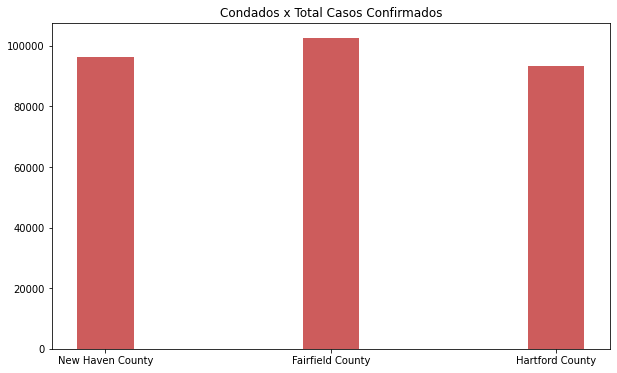

In [ ]:
dfplot = dfspark1.groupBy('Condado').sum('Casos_Novos')

x = dfplot.toPandas()['Condado'].values.tolist()
y = dfplot.toPandas()['sum(Casos_Novos)'].values.tolist()

plt.figure(figsize=(10, 6))
plt.title('Condados x Total Casos Confirmados')
plt.bar(x,y, color='indianred', width=0.25)
plt.show()

In [ ]:
#3 - Query para verificar a Média de Casos Novos agrupado por Condado
dfspark1.groupBy('Condado').agg(avg('Casos_Novos').alias('Media_Casos_Novos')).show()

+----------------+------------------+
|         Condado| Media_Casos_Novos|
+----------------+------------------+
|New Haven County|212.78097345132744|
|Fairfield County| 226.8296460176991|
| Hartford County| 206.3650442477876|
+----------------+------------------+



In [ ]:
#4 - Query para mostrar Novos Obitos Confirmados maior que 500 por dia
dfspark1.select(F.col('Data_Atualizacao'), F.col('Condado'), F.col('Novos_Obitos_Confirmados')).filter(F.col('Novos_Obitos_Confirmados') > 500).show()

+-------------------+----------------+------------------------+
|   Data_Atualizacao|         Condado|Novos_Obitos_Confirmados|
+-------------------+----------------+------------------------+
|2020-06-02 00:00:00|New Haven County|                   843.0|
|2020-05-31 00:00:00|New Haven County|                   822.0|
|2020-06-02 00:00:00|Fairfield County|                   998.0|
|2020-05-31 00:00:00|Fairfield County|                   990.0|
|2020-06-02 00:00:00| Hartford County|                   958.0|
|2020-05-31 00:00:00| Hartford County|                   944.0|
+-------------------+----------------+------------------------+



In [ ]:
#5 - Query para verificar a Média de  Novos Obitos Confirmados agrupado por Condado
dfspark1.groupBy('Condado').agg(avg('Novos_Obitos_Confirmados').alias('Media_Novos_Obitos_Confirmados')).show()

+----------------+------------------------------+
|         Condado|Media_Novos_Obitos_Confirmados|
+----------------+------------------------------+
|New Haven County|             4.307522123893805|
|Fairfield County|             4.117256637168142|
| Hartford County|             4.712389380530974|
+----------------+------------------------------+



In [ ]:
#6 - Query para mostrar o número total de Obitos Confirmados por Condado
dfspark1.groupBy("Condado").agg(sum("Novos_Obitos_Confirmados").alias("Soma_Novos_Obitos_Confirmados")).show()

+----------------+-----------------------------+
|         Condado|Soma_Novos_Obitos_Confirmados|
+----------------+-----------------------------+
|New Haven County|                       1947.0|
|Fairfield County|                       1861.0|
| Hartford County|                       2130.0|
+----------------+-----------------------------+



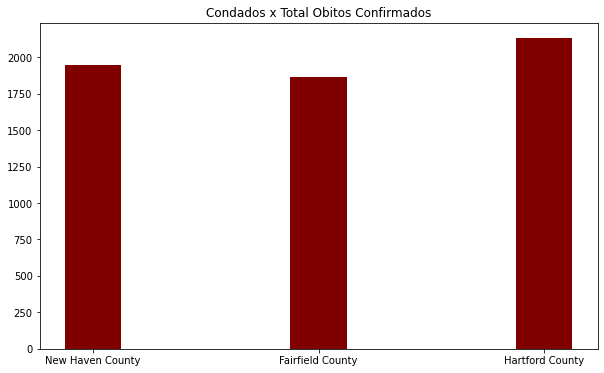

In [ ]:
dfplot2 = dfspark1.groupBy('Condado').sum('Novos_Obitos_Confirmados')

x2 = dfplot2.toPandas()['Condado'].values.tolist()
y2 = dfplot2.toPandas()['sum(Novos_Obitos_Confirmados)'].values.tolist()

plt.figure(figsize=(10, 6))
plt.title('Condados x Total Obitos Confirmados')
plt.bar(x2,y2, color='maroon', width=0.25)
plt.show()

In [ ]:
#7 - Query para verificar número Máximo de Casos Hospitalizados agrupado por Condado
dfspark1.groupBy('Condado').agg(max('Total_Casos_Hospitalizados').alias('Maximo_Casos_Hospitalizados')).show()

+----------------+---------------------------+
|         Condado|Maximo_Casos_Hospitalizados|
+----------------+---------------------------+
|New Haven County|                        638|
|Fairfield County|                        797|
| Hartford County|                        495|
+----------------+---------------------------+



# Spark SQL - Hospitalizados

Criando Tabela

In [ ]:
dfspark1.createOrReplaceTempView('hospitalizacao')

Queries usando SQL

In [ ]:
#1 - visão geral
spark.sql('SELECT * FROM hospitalizacao').show()

+-------------------+----------------+-----------------------+--------------------------+------------------------+-----------+------------------------+
|   Data_Atualizacao|         Condado|Total_Casos_Confirmados|Total_Casos_Hospitalizados|Total_Obitos_Confirmados|Casos_Novos|Novos_Obitos_Confirmados|
+-------------------+----------------+-----------------------+--------------------------+------------------------+-----------+------------------------+
|2020-06-02 00:00:00|New Haven County|                  11161|                       150|                     843|    11161.0|                   843.0|
|2020-06-03 00:00:00|New Haven County|                  11191|                       128|                     845|       30.0|                     2.0|
|2020-06-04 00:00:00|New Haven County|                  11282|                       127|                     855|       91.0|                    10.0|
|2020-06-05 00:00:00|New Haven County|                  11429|                       121

In [ ]:
# 2 - Query utilizada para filtrar apenas Condados onde os Casos Novos ultrapassem 500 */

spark.sql('SELECT Data_Atualizacao, Condado, Casos_Novos FROM hospitalizacao WHERE Casos_Novos > 500').show()

+-------------------+----------------+-----------+
|   Data_Atualizacao|         Condado|Casos_Novos|
+-------------------+----------------+-----------+
|2020-06-02 00:00:00|New Haven County|    11161.0|
|2020-07-14 00:00:00|New Haven County|      694.0|
|2020-07-15 00:00:00|New Haven County|      545.0|
|2020-08-04 00:00:00|New Haven County|      806.0|
|2020-05-31 00:00:00|New Haven County|    11088.0|
|2020-07-09 00:00:00|New Haven County|     1003.0|
|2020-08-20 00:00:00|New Haven County|      787.0|
|2020-10-25 00:00:00|New Haven County|      520.0|
|2020-11-01 00:00:00|New Haven County|      616.0|
|2020-11-08 00:00:00|New Haven County|      834.0|
|2020-11-12 00:00:00|New Haven County|      747.0|
|2020-11-15 00:00:00|New Haven County|     1014.0|
|2020-11-18 00:00:00|New Haven County|      504.0|
|2020-11-22 00:00:00|New Haven County|     1110.0|
|2020-11-26 00:00:00|New Haven County|      759.0|
|2020-11-29 00:00:00|New Haven County|     1537.0|
|2020-11-30 00:00:00|New Haven 

In [ ]:
#3 - Comando utilizado para Somar os Casos Confirmados*/

spark.sql('SELECT Condado, SUM(Casos_Novos) AS Soma_Casos_Novos FROM hospitalizacao GROUP BY Condado ORDER BY Soma_Casos_Novos ASC').show()

+----------------+----------------+
|         Condado|Soma_Casos_Novos|
+----------------+----------------+
| Hartford County|         93277.0|
|New Haven County|         96177.0|
|Fairfield County|        102527.0|
+----------------+----------------+



In [ ]:
#4 - Comando utilizado para fazer a média de Casos Hospitalizados por Condado*/

spark.sql('SELECT Condado, ROUND(AVG(Casos_Novos), 2) AS Media_Casos_Novos FROM hospitalizacao GROUP BY Condado ORDER BY Media_Casos_Novos').show()

+----------------+-----------------+
|         Condado|Media_Casos_Novos|
+----------------+-----------------+
| Hartford County|           206.37|
|New Haven County|           212.78|
|Fairfield County|           226.83|
+----------------+-----------------+



In [ ]:
#5 - Query utilizada para filtrar apenas Condados onde os Novos Obitos ultrapassem 500 por dia

spark.sql('SELECT Data_Atualizacao, Condado, Novos_Obitos_Confirmados FROM hospitalizacao WHERE Novos_Obitos_Confirmados > 500').show()

+-------------------+----------------+------------------------+
|   Data_Atualizacao|         Condado|Novos_Obitos_Confirmados|
+-------------------+----------------+------------------------+
|2020-06-02 00:00:00|New Haven County|                   843.0|
|2020-05-31 00:00:00|New Haven County|                   822.0|
|2020-06-02 00:00:00|Fairfield County|                   998.0|
|2020-05-31 00:00:00|Fairfield County|                   990.0|
|2020-06-02 00:00:00| Hartford County|                   958.0|
|2020-05-31 00:00:00| Hartford County|                   944.0|
+-------------------+----------------+------------------------+



In [ ]:
#6 - Query utilizada para fazer a média de obitos confirmados por Condado*/

spark.sql('SELECT Condado, ROUND(AVG(Novos_Obitos_Confirmados), 2) AS Media_Novos_Obitos_Confirmados FROM hospitalizacao GROUP BY Condado ORDER BY Media_Novos_Obitos_Confirmados').show()

+----------------+------------------------------+
|         Condado|Media_Novos_Obitos_Confirmados|
+----------------+------------------------------+
|Fairfield County|                          4.12|
|New Haven County|                          4.31|
| Hartford County|                          4.71|
+----------------+------------------------------+



In [ ]:
#7 - Query utilizada para Somar os Obitos Confirmados*/

spark.sql('SELECT Condado, SUM(Novos_Obitos_Confirmados) AS Soma_Novos_Obitos_Confirmados FROM hospitalizacao GROUP BY Condado ORDER BY Soma_Novos_Obitos_Confirmados ASC').show()

+----------------+-----------------------------+
|         Condado|Soma_Novos_Obitos_Confirmados|
+----------------+-----------------------------+
|Fairfield County|                       1861.0|
|New Haven County|                       1947.0|
| Hartford County|                       2130.0|
+----------------+-----------------------------+



In [ ]:
#8 - Cria uma tabela com o máximo Casos Confirmados, Hospitalizados e a média dos Casos Novos */

spark.sql('SELECT Condado, MAX(Total_Casos_Confirmados) AS Max_Casos_Confirmados, MAX(Total_Casos_Hospitalizados) AS Max_Casos_Hospitalizados, ROUND(AVG(Casos_Novos), 2)\
AS Media_Casos_Novos FROM hospitalizacao GROUP BY Condado ORDER BY Media_Casos_Novos  DESC').show()

+----------------+---------------------+------------------------+-----------------+
|         Condado|Max_Casos_Confirmados|Max_Casos_Hospitalizados|Media_Casos_Novos|
+----------------+---------------------+------------------------+-----------------+
|Fairfield County|               102527|                     797|           226.83|
|New Haven County|                96177|                     638|           212.78|
| Hartford County|                93277|                     495|           206.37|
+----------------+---------------------+------------------------+-----------------+



In [ ]:
#9 - Cria uam Query com Soma de Casos Novos, Somas de Obitos Novos e suas Médias, agrupadas por Condado

spark.sql('SELECT Condado, SUM(Casos_Novos) AS Soma_Casos_Novos, SUM(Novos_Obitos_Confirmados) AS Soma_Obitos_Confirmados, ROUND(AVG(Casos_Novos), 2) AS Media_Casos_Novos,\
ROUND(AVG(Novos_Obitos_Confirmados), 2) AS Media_Novos_Obitos_Confirmados FROM hospitalizacao GROUP BY Condado ORDER BY Media_Casos_Novos  DESC').show()

+----------------+----------------+-----------------------+-----------------+------------------------------+
|         Condado|Soma_Casos_Novos|Soma_Obitos_Confirmados|Media_Casos_Novos|Media_Novos_Obitos_Confirmados|
+----------------+----------------+-----------------------+-----------------+------------------------------+
|Fairfield County|        102527.0|                 1861.0|           226.83|                          4.12|
|New Haven County|         96177.0|                 1947.0|           212.78|                          4.31|
| Hartford County|         93277.0|                 2130.0|           206.37|                          4.71|
+----------------+----------------+-----------------------+-----------------+------------------------------+



#PySpark - Vacinação

Criando DataFrame de Vacinação

Criando DataFrame

In [ ]:
dfspark2 = spark.read.format('csv').option('header','true').option('inferschema', 'true').option('delimiter', ',').load('/content/Condados_Vacinacao.csv')

In [ ]:
dfspark2.printSchema()
dfspark2.show()

root
 |-- Data: string (nullable = true)
 |-- Condado: string (nullable = true)
 |-- Estado: string (nullable = true)
 |-- Numero_total_vacinados: integer (nullable = true)
 |-- Numero_total_65+: integer (nullable = true)
 |-- Porcentagem_total_65+: double (nullable = true)
 |-- Vacinas_Dia: double (nullable = true)
 |-- Vacinas_Dia_65+: double (nullable = true)

+----------+----------------+------+----------------------+----------------+---------------------+-----------+---------------+
|      Data|         Condado|Estado|Numero_total_vacinados|Numero_total_65+|Porcentagem_total_65+|Vacinas_Dia|Vacinas_Dia_65+|
+----------+----------------+------+----------------------+----------------+---------------------+-----------+---------------+
|2021-08-10|New Haven County|    CT|                581344|          137567|                 90.1|   581344.0|       137567.0|
|2021-09-10|New Haven County|    CT|                581984|          137635|                 90.2|      640.0|           68.0|

Filtros

In [ ]:
# 1 - Query para mostrar Vacinação por dia maior que 500
dfspark2.select(F.col('Data'), F.col('Condado'), F.col('Vacinas_Dia')).filter(F.col('Vacinas_Dia') > 500).show()

+----------+----------------+-----------+
|      Data|         Condado|Vacinas_Dia|
+----------+----------------+-----------+
|2021-08-10|New Haven County|   581344.0|
|2021-09-10|New Haven County|      640.0|
|2021-10-10|New Haven County|      520.0|
|2021-11-10|New Haven County|      781.0|
|2021-10-14|New Haven County|      623.0|
|2021-10-15|New Haven County|      703.0|
|2021-10-16|New Haven County|      519.0|
|2021-10-17|New Haven County|      666.0|
|2021-10-19|New Haven County|      849.0|
|2021-10-20|New Haven County|      501.0|
|2021-10-21|New Haven County|      578.0|
|2021-10-22|New Haven County|      827.0|
|2021-10-23|New Haven County|      512.0|
|2021-10-25|New Haven County|      895.0|
|2021-10-28|New Haven County|      561.0|
|2021-10-29|New Haven County|      529.0|
|2021-01-11|New Haven County|     1110.0|
|2021-04-11|New Haven County|      536.0|
|2021-07-11|New Haven County|      503.0|
|2021-08-11|New Haven County|      604.0|
+----------+----------------+-----

In [ ]:
#2 - Query para mostrar o número total de Vacinação por Condado
dfspark2.groupBy("Condado").agg(sum("Vacinas_Dia").alias("Total_Vacinacao")).show()

+----------------+---------------+
|         Condado|Total_Vacinacao|
+----------------+---------------+
|New Haven County|       600533.0|
|Fairfield County|       690446.0|
| Hartford County|       611379.0|
+----------------+---------------+



Matplotlib

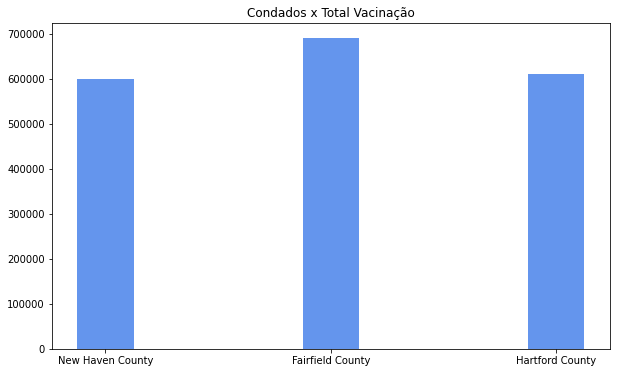

In [ ]:
dfplot3 = dfspark2.groupBy('Condado').sum('Vacinas_Dia')

x3 = dfplot3.toPandas()['Condado'].values.tolist()
y3 = dfplot3.toPandas()['sum(Vacinas_Dia)'].values.tolist()

plt.figure(figsize=(10, 6))
plt.title('Condados x Total Vacinação')
plt.bar(x3,y3, color='cornflowerblue', width=0.25)
plt.show()

In [ ]:
# 3 - Query para mostrar Vacinação 65 por dia 200
dfspark2.select(F.col('Data'), F.col('Condado'), F.col('Vacinas_Dia_65+')).filter(F.col('Vacinas_Dia_65+') < 200).show(124)

+----------+----------------+---------------+
|      Data|         Condado|Vacinas_Dia_65+|
+----------+----------------+---------------+
|2021-09-10|New Haven County|           68.0|
|2021-10-10|New Haven County|           45.0|
|2021-11-10|New Haven County|           57.0|
|2021-12-10|New Haven County|           17.0|
|2021-10-13|New Haven County|           38.0|
|2021-10-14|New Haven County|           66.0|
|2021-10-15|New Haven County|           64.0|
|2021-10-16|New Haven County|           50.0|
|2021-10-17|New Haven County|           45.0|
|2021-10-18|New Haven County|            5.0|
|2021-10-19|New Haven County|           42.0|
|2021-10-20|New Haven County|           37.0|
|2021-10-21|New Haven County|           46.0|
|2021-10-22|New Haven County|           76.0|
|2021-10-23|New Haven County|           40.0|
|2021-10-24|New Haven County|            3.0|
|2021-10-25|New Haven County|           85.0|
|2021-10-26|New Haven County|           17.0|
|2021-10-27|New Haven County|     

In [ ]:
#4 - Query para mostrar o número total de Vacinação 65+ por Condado
dfspark2.groupBy("Condado").agg(sum('Vacinas_Dia_65+').alias('Total_Vacinas_65+')).show()

+----------------+-----------------+
|         Condado|Total_Vacinas_65+|
+----------------+-----------------+
|New Haven County|         139431.0|
|Fairfield County|         141709.0|
| Hartford County|         145498.0|
+----------------+-----------------+



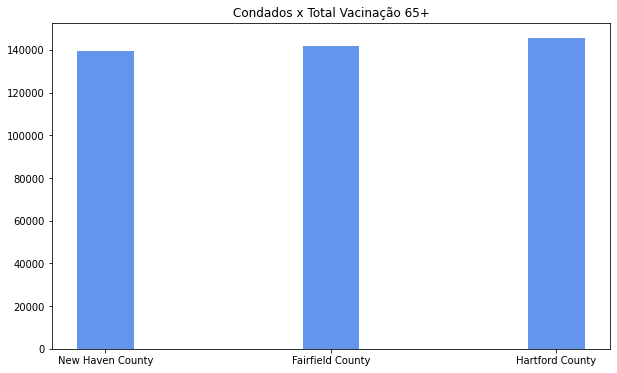

In [ ]:
dfplot4 = dfspark2.groupBy('Condado').sum('Vacinas_Dia_65+')

x4 = dfplot4.toPandas()['Condado'].values.tolist()
y4 = dfplot4.toPandas()['sum(Vacinas_Dia_65+)'].values.tolist()

plt.figure(figsize=(10, 6))
plt.title('Condados x Total Vacinação 65+')
plt.bar(x4,y4, color='cornflowerblue', width=0.25)
plt.show()

In [ ]:
#5 - Query para verificar Porcentagem Máxima de Vacinação 65+ agrupado por Condado
dfspark2.groupBy('Condado').agg(max('Porcentagem_total_65+').alias('Maximo_Porcentagem_total_65+')).show()

+----------------+----------------------------+
|         Condado|Maximo_Porcentagem_total_65+|
+----------------+----------------------------+
|New Haven County|                        91.4|
|Fairfield County|                        92.0|
| Hartford County|                        93.6|
+----------------+----------------------------+



#Spark SQL - Vacinação

In [ ]:
dfspark2 = dfspark2.withColumnRenamed('Numero_total_65+', 'Numero_total_65')
dfspark2 = dfspark2.withColumnRenamed('Porcentagem_total_65+', 'Porcentagem_total_65')
dfspark2 = dfspark2.withColumnRenamed('Vacinas_Dia_65+', 'Vacinas_Dia_65')

In [ ]:
dfspark2.createOrReplaceTempView('vacinacao')

Utilizando SQL

In [ ]:
#1 - visão geral
spark.sql('SELECT * FROM vacinacao').show()

+----------+----------------+------+----------------------+---------------+--------------------+-----------+--------------+
|      Data|         Condado|Estado|Numero_total_vacinados|Numero_total_65|Porcentagem_total_65|Vacinas_Dia|Vacinas_Dia_65|
+----------+----------------+------+----------------------+---------------+--------------------+-----------+--------------+
|2021-08-10|New Haven County|    CT|                581344|         137567|                90.1|   581344.0|      137567.0|
|2021-09-10|New Haven County|    CT|                581984|         137635|                90.2|      640.0|          68.0|
|2021-10-10|New Haven County|    CT|                582504|         137680|                90.2|      520.0|          45.0|
|2021-11-10|New Haven County|    CT|                583285|         137737|                90.2|      781.0|          57.0|
|2021-12-10|New Haven County|    CT|                583557|         137754|                90.3|      272.0|          17.0|
|2021-10

In [ ]:
#2 - Query utilizada para visualizar o número de vacinações por dia maiores de 500 */

spark.sql('SELECT Data, Condado, Vacinas_Dia FROM vacinacao WHERE Vacinas_Dia > 500').show()

+----------+----------------+-----------+
|      Data|         Condado|Vacinas_Dia|
+----------+----------------+-----------+
|2021-08-10|New Haven County|   581344.0|
|2021-09-10|New Haven County|      640.0|
|2021-10-10|New Haven County|      520.0|
|2021-11-10|New Haven County|      781.0|
|2021-10-14|New Haven County|      623.0|
|2021-10-15|New Haven County|      703.0|
|2021-10-16|New Haven County|      519.0|
|2021-10-17|New Haven County|      666.0|
|2021-10-19|New Haven County|      849.0|
|2021-10-20|New Haven County|      501.0|
|2021-10-21|New Haven County|      578.0|
|2021-10-22|New Haven County|      827.0|
|2021-10-23|New Haven County|      512.0|
|2021-10-25|New Haven County|      895.0|
|2021-10-28|New Haven County|      561.0|
|2021-10-29|New Haven County|      529.0|
|2021-01-11|New Haven County|     1110.0|
|2021-04-11|New Haven County|      536.0|
|2021-07-11|New Haven County|      503.0|
|2021-08-11|New Haven County|      604.0|
+----------+----------------+-----

In [ ]:
#3 - Query utilizada para mostrar a soma de vacinação por condados */

spark.sql('SELECT Condado, SUM(Vacinas_Dia) AS Soma_Vacinas_Dia FROM vacinacao GROUP BY Condado ORDER BY Soma_Vacinas_Dia ASC').show()

+----------------+----------------+
|         Condado|Soma_Vacinas_Dia|
+----------------+----------------+
|New Haven County|        600533.0|
| Hartford County|        611379.0|
|Fairfield County|        690446.0|
+----------------+----------------+



In [ ]:
#4 - Query utilizada para visualizar o número de idosos vacinados menores que 200 */

spark.sql('SELECT Data, Condado, Vacinas_Dia_65 FROM vacinacao WHERE Vacinas_Dia_65 < 200').show()

+----------+----------------+--------------+
|      Data|         Condado|Vacinas_Dia_65|
+----------+----------------+--------------+
|2021-09-10|New Haven County|          68.0|
|2021-10-10|New Haven County|          45.0|
|2021-11-10|New Haven County|          57.0|
|2021-12-10|New Haven County|          17.0|
|2021-10-13|New Haven County|          38.0|
|2021-10-14|New Haven County|          66.0|
|2021-10-15|New Haven County|          64.0|
|2021-10-16|New Haven County|          50.0|
|2021-10-17|New Haven County|          45.0|
|2021-10-18|New Haven County|           5.0|
|2021-10-19|New Haven County|          42.0|
|2021-10-20|New Haven County|          37.0|
|2021-10-21|New Haven County|          46.0|
|2021-10-22|New Haven County|          76.0|
|2021-10-23|New Haven County|          40.0|
|2021-10-24|New Haven County|           3.0|
|2021-10-25|New Haven County|          85.0|
|2021-10-26|New Haven County|          17.0|
|2021-10-27|New Haven County|          48.0|
|2021-10-2

In [ ]:
#5 - Query para verificar Porcentagem Máxima de Vacinação 65+ agrupado por Condado */

spark.sql('SELECT Condado, MAX(Porcentagem_total_65) AS Porcentagem_Total_65_Maxima FROM vacinacao GROUP BY Condado ORDER BY Porcentagem_Total_65_Maxima ASC').show()

+----------------+---------------------------+
|         Condado|Porcentagem_Total_65_Maxima|
+----------------+---------------------------+
|New Haven County|                       91.4|
|Fairfield County|                       92.0|
| Hartford County|                       93.6|
+----------------+---------------------------+

